<a href="https://colab.research.google.com/github/materokatti/machine_learning_study/blob/main/gradient_descent_for_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 🧪 1. Import Libraries

In [4]:
import numpy as np
import matplotlib.pyplot as plt

* `numpy` is used for mathematical operations.

* `matplotlib.pyplot` is for plotting graphs.

## 📐 2. Define the Sigmoid Function

In [5]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


The sigmoid function maps any number to a value between 0 and 1 — useful for probabilities in logistic regression.

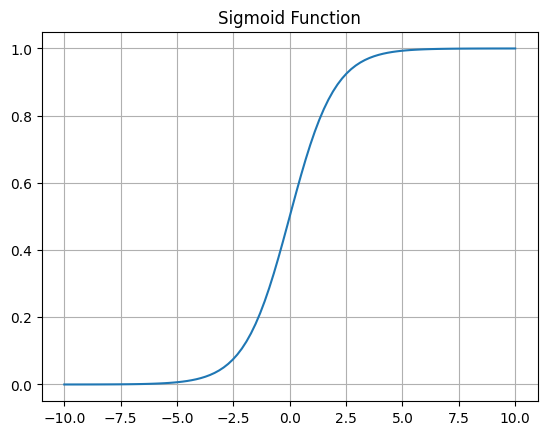

In [6]:
# Plot to visualize the sigmoid function
z = np.linspace(-10, 10, 100)
plt.plot(z, sigmoid(z))
plt.title("Sigmoid Function")
plt.grid(True)
plt.show()

## 💰 3. Define the Cost Function

In [7]:
def compute_cost(X, y, w, b):
    m = X.shape[0]
    f = sigmoid(np.dot(X, w) + b)
    cost = -1/m * np.sum(y * np.log(f + 1e-15) + (1 - y) * np.log(1 - f + 1e-15))
    return cost

## 📉 4. Define the Gradient Function

In [8]:
def compute_gradient(X, y, w, b):
    m, n = X.shape
    f = sigmoid(np.dot(X, w) + b)
    err = f - y
    dj_dw = 1/m * np.dot(X.T, err)
    dj_db = 1/m * np.sum(err)
    return dj_dw, dj_db

## 🏃‍♂️ 5. Define Gradient Descent

In [9]:
def gradient_descent(X, y, w_in, b_in, alpha, num_iters):
    w = w_in.copy()
    b = b_in
    J_history = []

    for i in range(num_iters):
        dj_dw, dj_db = compute_gradient(X, y, w, b)
        w -= alpha * dj_dw
        b -= alpha * dj_db
        J = compute_cost(X, y, w, b)
        J_history.append(J)

    return w, b, J_history

## 🧪 6. Generate Simple 2D Data for Binary Classification

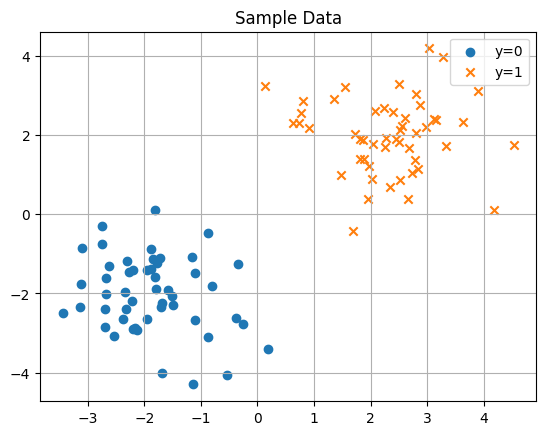

In [10]:
np.random.seed(1)
X_class0 = np.random.randn(50, 2) + np.array([-2, -2])
X_class1 = np.random.randn(50, 2) + np.array([2, 2])
X = np.vstack([X_class0, X_class1])
y = np.array([0]*50 + [1]*50)

plt.scatter(X[y==0][:, 0], X[y==0][:, 1], marker='o', label='y=0')
plt.scatter(X[y==1][:, 0], X[y==1][:, 1], marker='x', label='y=1')
plt.legend()
plt.title("Sample Data")
plt.grid(True)
plt.show()


## 🔁 7. Run Gradient Descent

In [11]:
w_init = np.zeros(2)
b_init = 0
alpha = 0.1
iterations = 100

w, b, J_hist = gradient_descent(X, y, w_init, b_init, alpha, iterations)

print("Final w:", w)
print("Final b:", b)

Final w: [1.16519426 1.06749556]
Final b: -0.05156885562195306


## 🔍 8. Visualize Decision Boundary

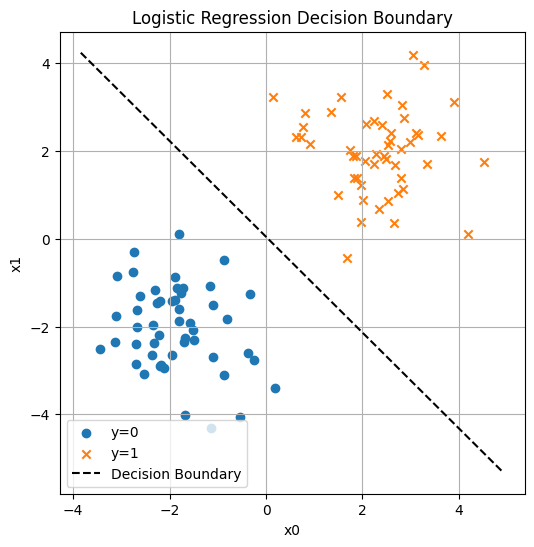

In [12]:
plt.figure(figsize=(6, 6))
plt.scatter(X[y==0][:, 0], X[y==0][:, 1], marker='o', label='y=0')
plt.scatter(X[y==1][:, 0], X[y==1][:, 1], marker='x', label='y=1')

# w0 * x + w1 * y + b = 0 --> solve for y
x_vals = np.array(plt.gca().get_xlim())
y_vals = -(w[0]*x_vals + b) / w[1]
plt.plot(x_vals, y_vals, 'k--', label='Decision Boundary')

plt.xlabel('x0')
plt.ylabel('x1')
plt.legend()
plt.title('Logistic Regression Decision Boundary')
plt.grid(True)
plt.show()


## 📈 9. Plot Cost over Iterations

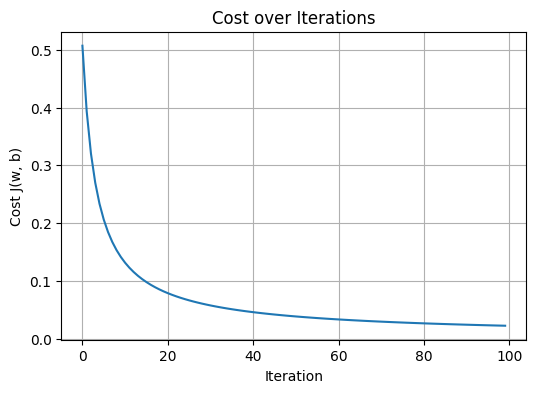

In [13]:
plt.figure(figsize=(6, 4))
plt.plot(J_hist)
plt.xlabel('Iteration')
plt.ylabel('Cost J(w, b)')
plt.title('Cost over Iterations')
plt.grid(True)
plt.show()
